# An Introduction to Matplotlib

* Tenzing HY Joshi: thjoshi@lbl.gov
* Nick Swanson-Hysell: swanson-hysell@berkeley.edu

## What is Matplotlib?

> matplotlib is a library for making 2D plots of arrays in Python. ... matplotlib is designed with the philosophy that you should be able to create simple plots with just a few commands, or just one! ... 

> The matplotlib code is conceptually divided into **three** parts: **the pylab interface** is the set of functions provided by matplotlib.pylab which allow the user to create plots with code quite similar to MATLAB figure generating code (Pyplot tutorial). **The matplotlib frontend or matplotlib API** is the set of classes that do the heavy lifting, creating and managing figures, text, lines, plots and so on (Artist tutorial). This is an abstract interface that knows nothing about output. **The backends** are device-dependent drawing devices, aka renderers, that transform the frontend representation to hardcopy or a display device (What is a backend?). 

## Resources
* [Matplotlib website](www.matplotlib.org)
* Other
* Other
* Other

## What I'll touch on
* Importing  
* Simple plots
* Figures and Axes
* Useful plot types
* Formatting
  * Specific commands
  * matplotlibrc file
  * Style Sheets
* An example or two of code to make a publication plot

In [ ]:
import matplotlib as mpl

In [ ]:
mpl

In [17]:
# I normally prototype my code in an editor + ipy terminal.
# In those cases I import pyplot and numpy via
import matplotlib.pyplot as plt
import numpy as np

# In Jupy notebooks we've got magic functions and pylab gives you pyplot as plt and numpy as np
# %pylab 

# Additionally, inline will let you plot inline of the notebook
# %pylab inline

# And notebook, as I've just found out gives you some resizing etc... tools inline.
# %pylab notebook

In [21]:
y = np.ones(10)

for x in range(2,10):
    y[x] = y[x-2] + y[x-1]

plt.plot(y)
plt.title('This story')

### Where's the plot to this story?

By default, with pyplot the *interactive* Mode is turned *off*.  That means that the state of our Figure is updated on every plt command, but only drawn when we ask for it to be drawn `plt.draw()` and shown when we ask for it to be shown `plt.show()`.  So lets have a look at what happened.

In [22]:
plt.show()

In [23]:
print('I can not run this command until I close the window because interactive mode is turned off')

I can not run this command until I close the window because interactive mode is turned off


### Interactive mode on or off is a preference. See how it works for your workflow.
* `plt.ion()` can be used to turn interactive mode on
* `plt.ioff()` then turns it off


For now lets switch over to the `%pylab notebook` configuration to make it easier on ourselves.

In [106]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 7.0)

Populating the interactive namespace from numpy and matplotlib


# Some Simple Plots

<IPython.core.display.Javascript object>


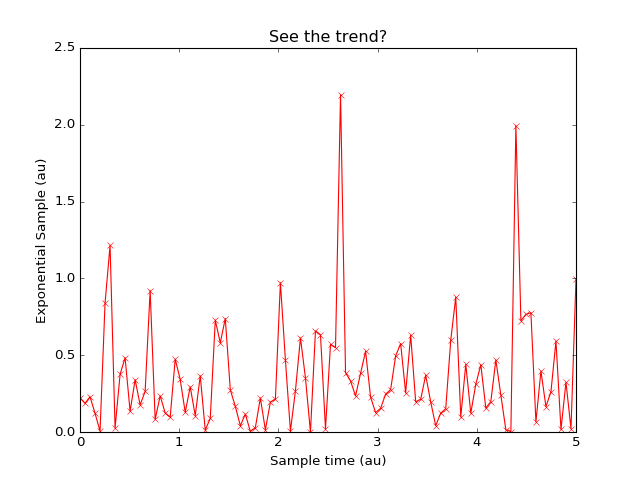

In [63]:
x = np.linspace(0,5,100)
y = np.random.exponential(1./3., 100)

plt.plot(x,y, c='r',marker='x')
plt.xlabel('Sample time (au)')
plt.ylabel('Exponential Sample (au)')
plt.title('See the trend?')

### Lots of kwargs to modify your plot
A few that I find most useful are:
* alpha
* color or c
* linestyle or ls
* linewidth or lw
* marker
* markersize or ms
* label


In [100]:
x = np.linspace(0,6.,1000.)

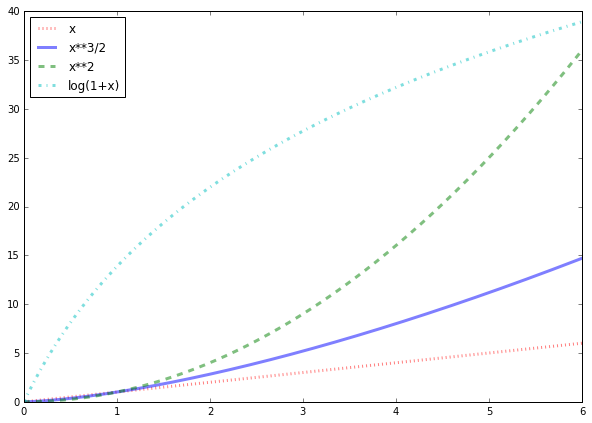

In [107]:
plt.plot(x, x, alpha = 0.5, c = 'r', ls = ':', lw=3., label='x')
plt.plot(x, x**(3./2), alpha = 0.5, c = 'b', ls = '-', lw=3., label='x**3/2')
plt.plot(x, x**2, alpha = 0.5, c = 'g', ls = '--', lw=3., label='x**2')
plt.plot(x, np.log(1+x)*20., alpha = 0.5, c = 'c', ls = '-.', lw=3., label='log(1+x)')

plt.legend(loc=2)

Nice scatter Example from the MPL website.  Note that the kwargs are different here.  Quick inspection of the docs is handy.

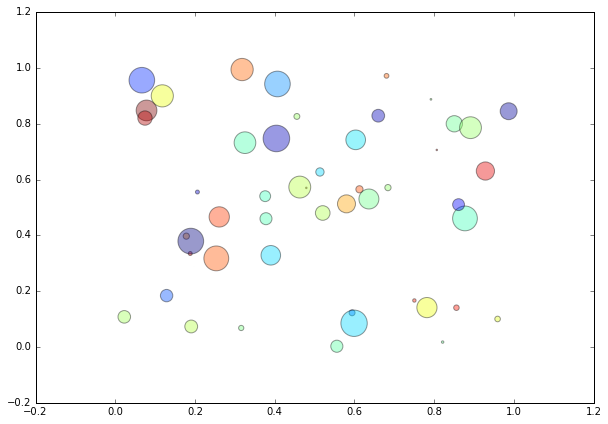

In [116]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

x = plt.scatter(x, y, s=area, c=colors, alpha=0.4)
plt.show()


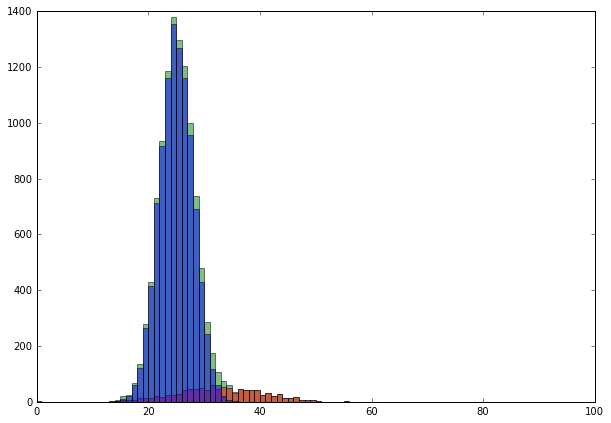

In [128]:
N=10000
values1 = np.random.normal(25., 3., N)
values2 = np.random.normal(33., 8., N/10)
valuestot = np.concatenate([values1,values2])

x1 = plt.hist(valuestot, bins=range(0,101,1), color='g', alpha=0.5)
x2 = plt.hist(values2, bins=range(0,101,1), color='r', alpha=0.5)
x3 = plt.hist(values1, bins=range(0,101,1), color='b', alpha=0.5)

### Loads of examples and plot types in the Matplotlib.org [Gallery](http://matplotlib.org/gallery.html)
* Its worth looking through some examples just to get a feel for what types of plots are available and how they are used.

# Figures and Axes

Working with MPL Figure and Axes objects gives you more control.  You can quickly make multiple plots, shared axes, etc... on the same Figure.

* Figure command
* Subplot command
* Different sized subplots
* Axes controls
  * ticks, labels, else?

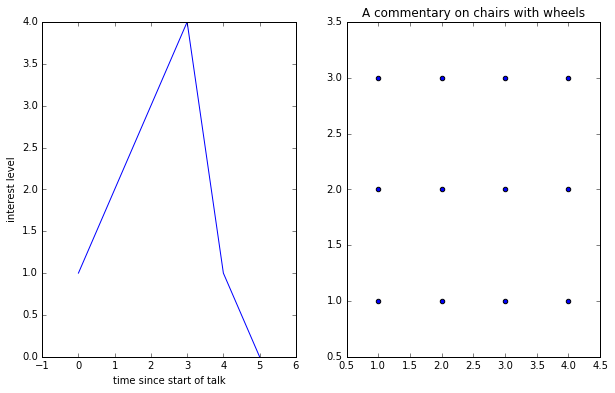

In [151]:
fig = plt.figure(figsize=(10,6))

# Make an axes as if the figure had 1 row, 2 columns and it would be the first of the two sub-divisions.
ax1 = fig.add_subplot(121)
plot1 = ax1.plot([1,2,3,4,1,0])
ax1.set_xlabel('time since start of talk')
ax1.set_ylabel('interest level')
ax1.set_xbound([-1.,6.])



# Make an axes as if the figure had 1 row, 2 columns and it would be the second of the two sub-divisions.
ax2 = fig.add_subplot(122)
plot2 = ax2.scatter([1,1,1,2,2,2,3,3,3,4,4,4], [1,2,3]*4)
ax2.set_title('A commentary on chairs with wheels')

In [149]:
print(plot1)
print(plot2)

`fig.add_axes` is another option for adding axes as you wish.
* Relative lower left corner x and y coordinates
* Relative x and y spans of the axes

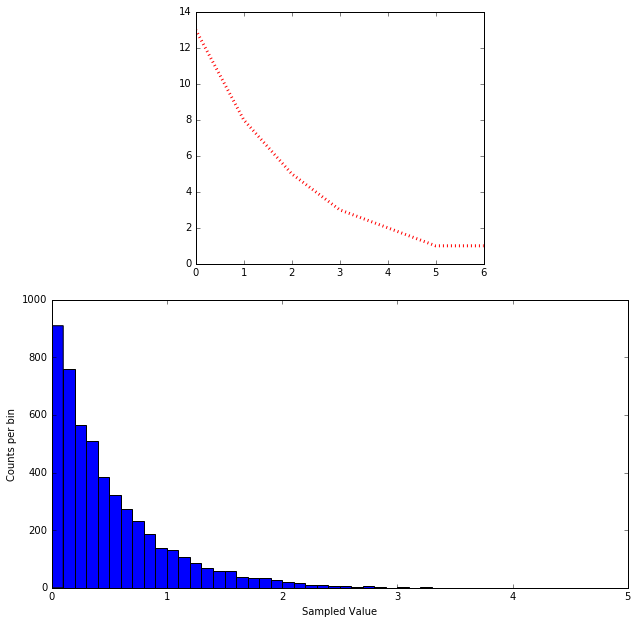

In [167]:
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_axes([0.1,0.1,0.8,0.4])
histvals = ax1.hist(np.random.exponential(0.5,5000), bins=np.arange(0,5, 0.1))
ax1.set_xlabel('Sampled Value')
ax1.set_ylabel('Counts per bin')

ax2 = fig2.add_axes([0.3,0.55, 0.4, 0.35])
ax2.plot([13,8,5,3,2,1,1],'r:',lw=3)

Alternative route to making axes and figures...

# Colors and colormaps

MPL has a variety of [Colormaps](http://matplotlib.org/users/colormaps.html) to choose from.

I also use the python library [Palettable](https://jiffyclub.github.io/palettable/) to gain access to a few other colors and colormaps in convienent ways.  I won't use this library today, but if you're interested in some other options from what MPL has it is worth a look.

In [129]:
plt.colormaps()

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 u'afmhot',
 u'afmhot_r',
 u'autumn',
 u'autumn_r',
 u'binary',
 u'binary_r',
 u'bone',
 u'bone_r',
 u'b

In [179]:
cmap1 = plt.cm.cubehelix
Ncolors = 12
colors = cmap1(np.linspace(0,1,Ncolors))

* Sampling colors from a colormap
* Examples
* Normalizing colormaps (lognorm)
* cmap kawrg

# Lines and text

* Adding horizontal and vertical lines
  * `hlines` and `vlines`
* Adding text to your figures is also often needed.

In [ ]:
plt.vlines

# A Publication Example